<a href="https://colab.research.google.com/github/estebanvz/alura-deep-learning-2/blob/clase06/Aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2, suppress=True)

# Dataset y Normalización

In [2]:
dataset = keras.datasets.fashion_mnist
((img_entrenamiento, etiquetas_entrenamiento),(img_test, etiquetas_test)) = dataset.load_data()
img_entrenamiento = img_entrenamiento/255.0
img_test = img_test/255.0
img_entrenamiento.shape, img_test.shape

((60000, 28, 28), (10000, 28, 28))

# Cargar Modelo

In [3]:
modelo_caro = keras.models.load_model("/content/drive/MyDrive/alura/deep_learning_2/modelo_inicial_caro.h5")

In [4]:
modelo_caro.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 50)                39250     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_21 (Dense)            (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_22 (Dense)            (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-tra

# Modelo Tiny

In [20]:
tiny = keras.Sequential()
tiny.add(keras.layers.Input(3,))
tiny.add(keras.layers.Dense(3,kernel_initializer="GlorotNormal"))
tiny.add(keras.layers.Dense(2,))
tiny.predict(np.array([[0.5,0.3,0.2]]))

array([[0.26, 0.07]], dtype=float32)

In [ ]:
tiny.layers[0].get_weights()[0].shape

(3, 3)

In [ ]:
tiny.layers[1].get_weights()[0].shape

(3, 2)

In [ ]:
([0.5,0.3,0.2] @ tiny.layers[0].get_weights()[0]) @ tiny.layers[1].get_weights()[0]

array([-0.05,  0.1 ])

In [ ]:
tiny.layers[1].get_weights()

[array([[ 0.63, -0.59],
        [-0.44,  0.32],
        [-1.02,  1.08]], dtype=float32), array([0., 0.], dtype=float32)]

## Bias

In [ ]:
tiny.layers[0].get_weights()[1]

array([0., 0., 0.], dtype=float32)

In [ ]:
tiny.layers[1].get_weights()[1]

array([0., 0.], dtype=float32)

In [21]:
tiny.layers[0].get_config()

{'activation': 'linear',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dtype': 'float32',
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'GlorotNormal',
  'config': {'seed': None}},
 'kernel_regularizer': None,
 'name': 'dense_3',
 'trainable': True,
 'units': 3,
 'use_bias': True}

In [ ]:
tiny.layers[0].get_weights()

[array([[-0.73,  0.11,  0.58],
        [-0.44, -0.57, -0.67],
        [-0.73,  0.8 , -0.36]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

# Modificando pesos

In [5]:
pesos = modelo_caro.get_weights()
len(pesos)

6

In [6]:
for element in pesos:
  print("Estructura: {}".format(element.shape))

Estructura: (784, 50)
Estructura: (50,)
Estructura: (50, 50)
Estructura: (50,)
Estructura: (50, 10)
Estructura: (10,)


In [7]:
modelo_caro.evaluate(img_test, etiquetas_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4941 - accuracy: 0.8255


[0.49411362409591675, 0.8255000114440918]

In [8]:
nuevos_pesos=[]
for element in pesos:
  nuevos_pesos.append( np.zeros( element.shape ) )

In [9]:
modelo_caro.set_weights( nuevos_pesos )
modelo_caro.evaluate(img_test, etiquetas_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.5835 - accuracy: 0.1052


[2.583512544631958, 0.10520000010728836]

In [ ]:
modelo_caro.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
logs = modelo_caro.fit(
    img_entrenamiento,
    etiquetas_entrenamiento,
    validation_split=0.1,
    epochs=30
)

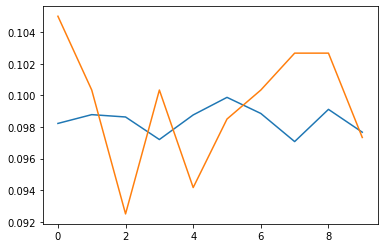

In [78]:
plt.plot(logs.history["accuracy"])
plt.plot(logs.history["val_accuracy"])

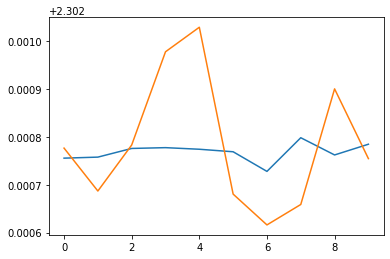

In [79]:
plt.plot(logs.history["loss"])
plt.plot(logs.history["val_loss"])

In [14]:
nuevos_pesos=[]
for element in pesos:
  nuevos_pesos.append( np.ones( element.shape ) )
modelo_caro.set_weights( nuevos_pesos )
modelo_caro.evaluate(img_test, etiquetas_test)
modelo_caro.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
logs = modelo_caro.fit(
    img_entrenamiento,
    etiquetas_entrenamiento,
    validation_split=0.1,
    epochs=30
)

313/313 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 1/30
1688/1688 [==============================] - 6s 3ms/step - loss: 159.1985 - accuracy: 0.1251 - val_loss: 2.0228 - val_accuracy: 0.2360
Epoch 2/30
1688/1688 [==============================] - 4s 3ms/step - loss: 1.7377 - accuracy: 0.3609 - val_loss: 1.2536 - val_accuracy: 0.5562
Epoch 3/30
1688/1688 [==============================] - 4s 3ms/step - loss: 1.4843 - accuracy: 0.4726 - val_loss: 1.1201 - val_accuracy: 0.5867
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 1.4050 - accuracy: 0.5093 - val_loss: 1.1095 - val_accuracy: 0.5503
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 1.3722 - accuracy: 0.5258 - val_loss: 1.0818 - val_accuracy: 0.5887
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: 1.3545 - accuracy: 0.5379 - val_loss: 1.0438 - val_accuracy: 0.6368
Epoch 7/30
1688/1688 [=======================

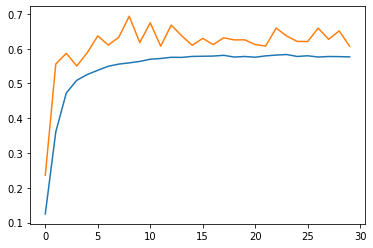

In [15]:
plt.plot(logs.history["accuracy"])
plt.plot(logs.history["val_accuracy"])

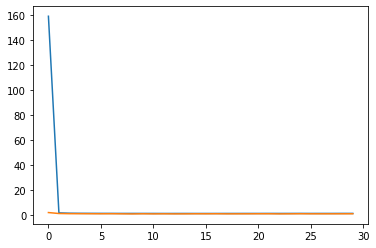

In [16]:
plt.plot(logs.history["loss"])
plt.plot(logs.history["val_loss"])

In [17]:
nuevos_pesos=[]
for element in pesos:
  nuevos_pesos.append( np.random.random( element.shape ) )
modelo_caro.set_weights( nuevos_pesos )
modelo_caro.evaluate(img_test, etiquetas_test)
modelo_caro.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
logs = modelo_caro.fit(
    img_entrenamiento,
    etiquetas_entrenamiento,
    validation_split=0.1,
    epochs=30
)

313/313 [==============================] - 1s 2ms/step - loss: 14905.3564 - accuracy: 0.1000
Epoch 1/30
1688/1688 [==============================] - 5s 3ms/step - loss: 1247.2085 - accuracy: 0.1308 - val_loss: 1.9547 - val_accuracy: 0.2760
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 1.9379 - accuracy: 0.2895 - val_loss: 1.3057 - val_accuracy: 0.5100
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 1.6027 - accuracy: 0.3956 - val_loss: 1.2040 - val_accuracy: 0.5227
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 1.5234 - accuracy: 0.4235 - val_loss: 1.1927 - val_accuracy: 0.5207
Epoch 5/30
1688/1688 [==============================] - 4s 3ms/step - loss: 1.4823 - accuracy: 0.4335 - val_loss: 1.1752 - val_accuracy: 0.5365
Epoch 6/30
1688/1688 [==============================] - 5s 3ms/step - loss: 1.4645 - accuracy: 0.4389 - val_loss: 1.1612 - val_accuracy: 0.5345
Epoch 7/30
1688/1688 [==================

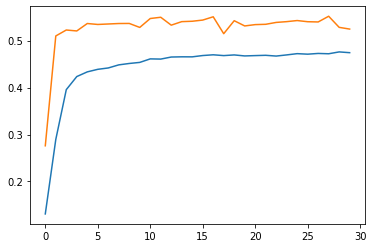

In [18]:
plt.plot(logs.history["accuracy"])
plt.plot(logs.history["val_accuracy"])

In [19]:
nuevos_pesos=[]
for element in pesos:
  nuevos_pesos.append( 
      np.random.normal(
          loc=0., 
          scale= (2.0/(np.sum(element.shape)))**0.5
          ,size= element.shape )
       ) #sqrt(2 / (fan_in + fan_out))
modelo_caro.set_weights( nuevos_pesos )
modelo_caro.evaluate(img_test, etiquetas_test)
modelo_caro.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
logs = modelo_caro.fit(
    img_entrenamiento,
    etiquetas_entrenamiento,
    validation_split=0.1,
    epochs=30
)

313/313 [==============================] - 1s 2ms/step - loss: 2.5393 - accuracy: 0.1626
Epoch 1/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.9942 - accuracy: 0.6377 - val_loss: 0.5215 - val_accuracy: 0.8192
Epoch 2/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.7201 - accuracy: 0.7489 - val_loss: 0.4825 - val_accuracy: 0.8280
Epoch 3/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6948 - accuracy: 0.7658 - val_loss: 0.4789 - val_accuracy: 0.8338
Epoch 4/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.6899 - accuracy: 0.7692 - val_loss: 0.5063 - val_accuracy: 0.8333
Epoch 5/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.6931 - accuracy: 0.7730 - val_loss: 0.4871 - val_accuracy: 0.8407
Epoch 6/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.7066 - accuracy: 0.7730 - val_loss: 0.4842 - val_accuracy: 0.8428
Epoch 7/30
1688/1688 [=========================

KeyboardInterrupt: ignored